In [1]:
#we can train nureal networks in pytorch by backprop using auto grad module in pytorch

In [2]:
#there are different types of losses in pytorch 
#1.CrossEntropy Loss
#2.NLLLoss


In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])
trainset = datasets.MNIST('~/.pytorch/MNIST_data',download=False,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

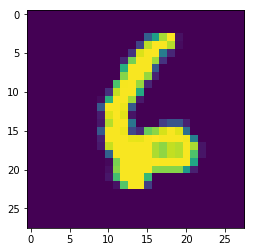

In [8]:
images,labels = next(iter(trainloader))
import matplotlib.pyplot as plt
plt.imshow(images[0].numpy().squeeze())

In [13]:
#making our model

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

#defining the loss
criterion = nn.NLLLoss()
#negative log likely hood loss
#Geeting the data
images, labels = next(iter(trainloader))
#Flatten images
images = images.view(images.shape[0],-1)
#forward pass to get the logits
logits = model(images)
#calculation of the loss
loss = criterion(logits,labels)

print(loss)

tensor(2.2953, grad_fn=<NllLossBackward>)


In [15]:
#Auto grad module in torch
x = torch.randn(2,2,requires_grad = True)
print(x)
y = x**2
print(y)
print(y.grad_fn)
#grad function seeing method of pytorch
z = y.mean()
print(x.grad)
print(y.grad)
z.backward()
#now all the grads are calculated
print(x.grad)
#After solving dz/dx comes this only ie x/2
print(x/2)

tensor([[-2.7858, -1.3265],
        [-0.4046, -1.7091]], requires_grad=True)
tensor([[7.7606, 1.7597],
        [0.1637, 2.9210]], grad_fn=<PowBackward0>)
None
None
tensor([[-1.3929, -0.6633],
        [-0.2023, -0.8545]])
tensor([[-1.3929, -0.6633],
        [-0.2023, -0.8545]], grad_fn=<DivBackward0>)


In [16]:
#we can build the model with loss and autograd together 
#as we have made the model before so now we need to back propogate it
print("Before backprop",model[0].weight.grad)
loss.backward()
print("After backprop",model[0].weight.grad)
#these are the grads for the first layer

Before backprop None
After backprop tensor([[-4.3594e-03, -4.3594e-03, -4.3594e-03,  ..., -4.3594e-03,
         -4.3594e-03, -4.3594e-03],
        [ 3.9724e-03,  3.9724e-03,  3.9724e-03,  ...,  3.9724e-03,
          3.9724e-03,  3.9724e-03],
        [-4.5776e-04, -4.5776e-04, -4.5776e-04,  ..., -4.5776e-04,
         -4.5776e-04, -4.5776e-04],
        ...,
        [ 5.3493e-05,  5.3493e-05,  5.3493e-05,  ...,  5.3492e-05,
          5.3492e-05,  5.3492e-05],
        [ 1.2199e-03,  1.2199e-03,  1.2199e-03,  ...,  1.2199e-03,
          1.2199e-03,  1.2199e-03],
        [-1.2465e-03, -1.2465e-03, -1.2465e-03,  ..., -1.2465e-03,
         -1.2465e-03, -1.2465e-03]])


In [17]:
#at last for training we need a optimizer we use the optim pakage of the pytorch library
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)
#we set learning rate by lr

In [18]:
#gradients are accumulated so we need to reset them a very important step
#we use optimizer.zero_grad() for that
print('Initial weights-',model[0].weight)
images,labels = next(iter(trainloader))
images.resize_(64,784)
#flatten the images
#clearing the previous gradients 
optimizer.zero_grad()
#doing the forward pass and a backward pass and then updating the weights
output = model(images)
loss = criterion(output,labels)
loss.backward()
print('Gradient-',model[0].weight.grad)
optimizer.step()
#weights are updated
print('Updated weights-',model[0].weight)

Initial weights- Parameter containing:
tensor([[-0.0300,  0.0274,  0.0309,  ..., -0.0334,  0.0067, -0.0058],
        [-0.0267,  0.0012,  0.0293,  ..., -0.0006,  0.0195,  0.0108],
        [-0.0281,  0.0345,  0.0105,  ...,  0.0110, -0.0146, -0.0025],
        ...,
        [ 0.0129, -0.0186, -0.0118,  ...,  0.0321,  0.0024, -0.0041],
        [-0.0343, -0.0269, -0.0232,  ...,  0.0071,  0.0122, -0.0254],
        [-0.0212, -0.0344, -0.0046,  ...,  0.0350,  0.0246,  0.0326]],
       requires_grad=True)
Gradient- tensor([[-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032],
        [ 0.0039,  0.0039,  0.0039,  ...,  0.0039,  0.0039,  0.0039],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003]])
Updated weights- Parameter containing:
tensor([[-0.0300,

In [24]:
#we can use for loop to iterate the process and use epochs to decide how many steps we need
#full model again
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
intv = 0
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        #flatten images
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        #intv += intv+1
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        #this thing gives us the loss we get
    else:
        #print(intv)
        #print(running_loss)
        #print(len(trainloader))
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8439922196778662
Training loss: 0.8191813738551984
Training loss: 0.5066545415026292
Training loss: 0.41658448920384655
Training loss: 0.37710283081859414


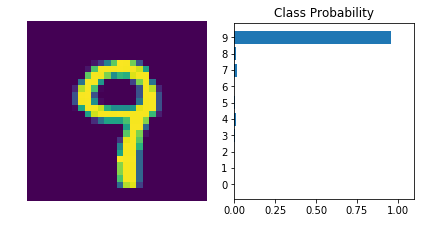

In [25]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)